<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
Load the Library<br><br> 
</h3>


In [157]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  Loading - "MNIST Data Set"<br><br>
  TensorFlow already contains the MNIST data set which can be loaded using Keras
</h3>


In [12]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
After Loading the MNIST data, Divide into train and test datasets<br><br>

</h3>


In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']


In [13]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [14]:
x_train.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

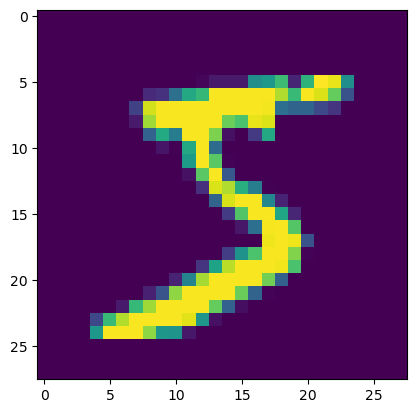

In [27]:
plt.imshow(x_train[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

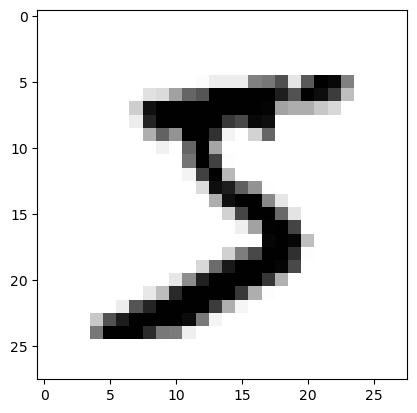

In [28]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  Checking the values of each pixel<br><br>
  Before Normalization
</h3>


In [30]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  Normalizing the data<br><br>
</h3>


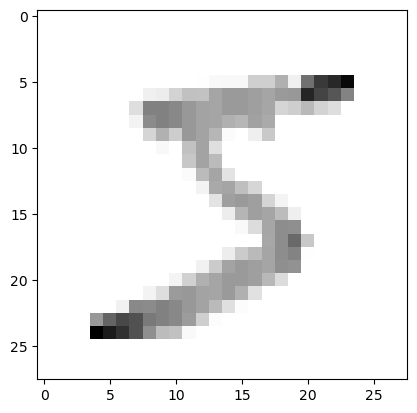

In [33]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  After Normalizing<br><br>
</h3>


In [36]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [37]:
y_train[0]

5

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  Resizing image to make it suitable for apply convolution operation<br><br>
</h3>


In [148]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">
  Creating Deep Neural Network<br><br>
</h3>


In [ ]:
model= Sequential()



In [158]:
model= Sequential()

# first Convolution Layer 0 1 2 3
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [163]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [164]:
history = model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)
history.history.keys()

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.7614 - loss: 0.7062 - val_accuracy: 0.9569 - val_loss: 0.1386
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9643 - loss: 0.1167 - val_accuracy: 0.9677 - val_loss: 0.1054
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.9752 - loss: 0.0794 - val_accuracy: 0.9802 - val_loss: 0.0663
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.9654 - val_loss: 0.1148
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9834 - loss: 0.0510 - val_accuracy: 0.9817 - val_loss: 0.0627


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [165]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9790 - loss: 0.0736
Test Loss on 10,000 test samples 0.05788873881101608
Validation Accuracy on 10,000 test samples 0.983299970626831


In [166]:
predictions = model.predict([x_testr])
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
[[1.12911035e-10 9.43326143e-07 3.27960635e-07 ... 9.99994159e-01
  5.39313518e-08 3.73128296e-06]
 [1.19379756e-05 5.32390132e-08 9.99986410e-01 ... 2.37774799e-07
  8.70300767e-07 1.01873914e-08]
 [2.46916557e-06 9.99964952e-01 2.31527861e-06 ... 6.54770793e-06
  2.40077975e-06 8.47752653e-06]
 ...
 [4.70181973e-08 1.98603425e-06 1.01414175e-08 ... 6.64011736e-07
  1.73052453e-04 3.28451657e-04]
 [3.38470045e-06 5.44332330e-08 4.15098400e-09 ... 2.45781867e-10
  3.20970925e-04 1.73558055e-05]
 [6.01219836e-05 5.03850366e-08 9.31162958e-06 ... 8.49205417e-09
  1.73733453e-04 1.09684595e-04]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


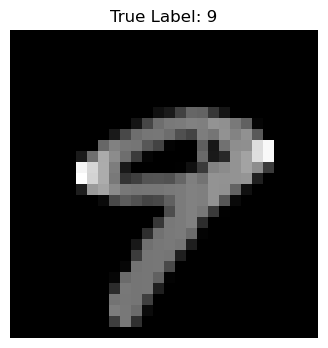

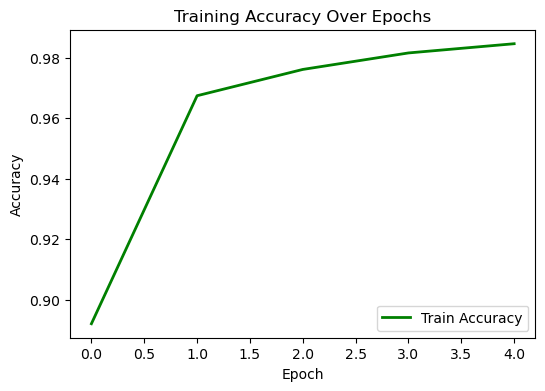

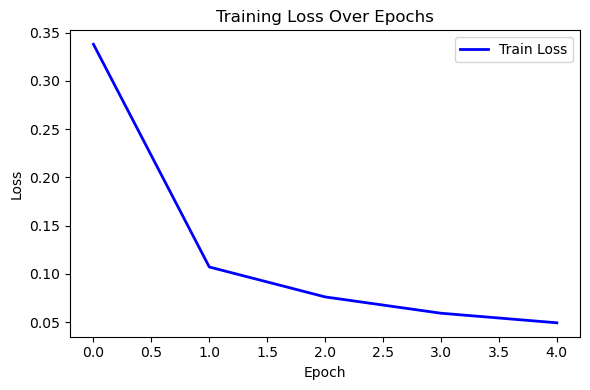

In [ ]:
sample_index = int(input("🔢 Pick a test sample index (e.g. 0 - 9999): "))

true_label = class_names[y_test[sample_index]]
predicted_probs = model.predict(np.expand_dims(x_testr[sample_index], axis=0))
predicted_label = class_names[np.argmax(predicted_probs)]

plt.figure(figsize=(6, 4))
plt.imshow(x_testr[sample_index], cmap='gray')
plt.title(f"True Label: {true_label}")
plt.xlabel(f"Model Prediction: {predicted_label}")
plt.axis('off')
plt.grid(False)

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], color='green', linewidth=2)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy"], loc="lower right")

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], color='blue', linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss"], loc="upper right")

plt.tight_layout()
plt.show()
